In [1]:
from __future__ import annotations
from titanic_lab.paths import (
    ROOT,
    TRAIN_CSV,
)  # and whatever common files that were defined in the src/paths.py
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random


In [2]:
df = pd.read_csv(TRAIN_CSV)


In [ ]:
print("Shape:", df.shape)  # expect (891, 12)
print("\nInfo():")
df.info()


In [ ]:
num_desc = df.describe()
print(num_desc)


In [ ]:
cat_desc = df.describe(include=["object", "category", "boolean"])
print(cat_desc)


In [ ]:
na = df.isna().sum().sort_values(ascending=False)
print("\nMissing values per column:")
print(na)


# Using the df["Age"] column with the .notna() method chained to the sum method takes all of the values
# This counts the number of non-missing values in the "Age" column.
# .notna() returns a boolean Series (True for present values), and .sum() counts the Trues.


In [7]:
n_non_missing_age = df["Age"].notna().sum()
print(f"\nNon-missing Age count: {n_non_missing_age} (expect 714)")



Non-missing Age count: 714 (expect 714)


In [8]:


def plot_rate(series: pd.Series, title: str) -> None:
    ax = series.sort_values(ascending=False).plot(kind="bar")
    ax.set_ylim(0, 1)
    ax.set_ylabel("Survival rate")
    ax.set_title(title)
    plt.tight_layout()
    plt.show()


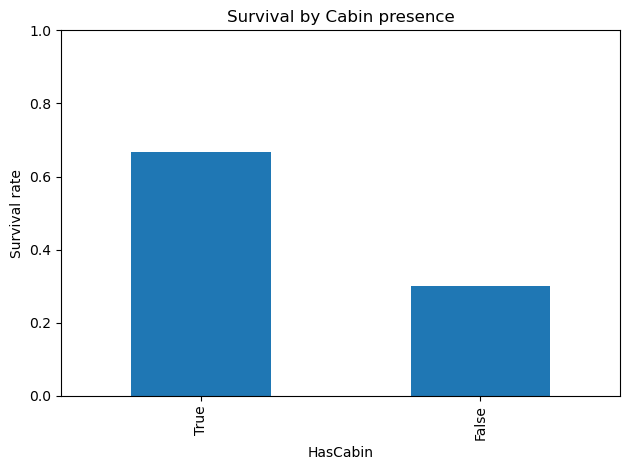

In [9]:
df["HasCabin"] = df["Cabin"].notna()
plot_rate(df.groupby("HasCabin")["Survived"].mean(), "Survival by Cabin presence")


In [10]:
print("\nSurvived value counts (0/1):")
print(df["Survived"].value_counts(dropna=False).sort_index())



Survived value counts (0/1):
Survived
0    549
1    342
Name: count, dtype: int64


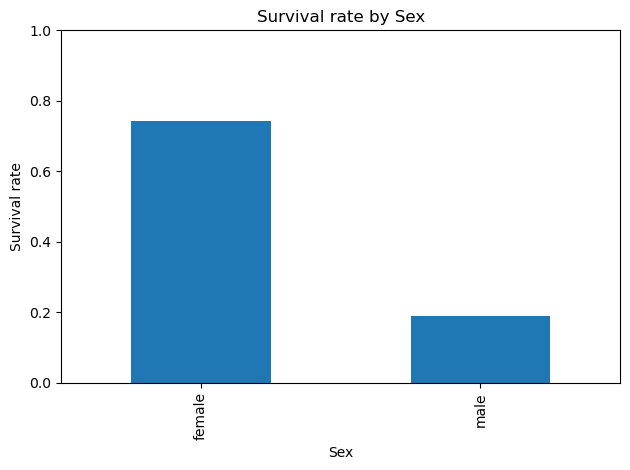

In [11]:
rate_by_sex = df.groupby("Sex")["Survived"].mean()
plot_rate(rate_by_sex, "Survival rate by Sex")


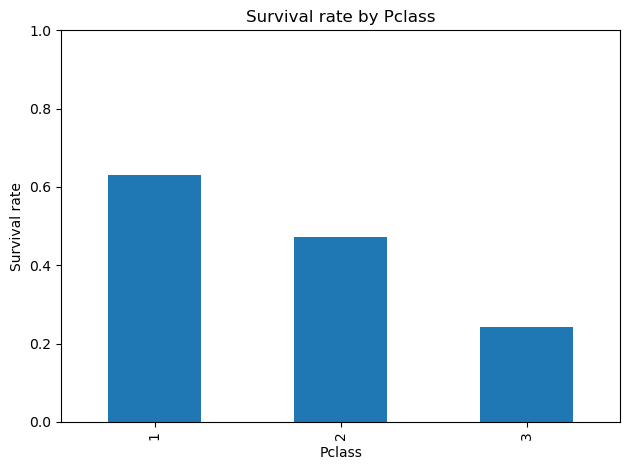

In [12]:
rate_by_pclass = df.groupby("Pclass")["Survived"].mean()
plot_rate(rate_by_pclass, "Survival rate by Pclass")


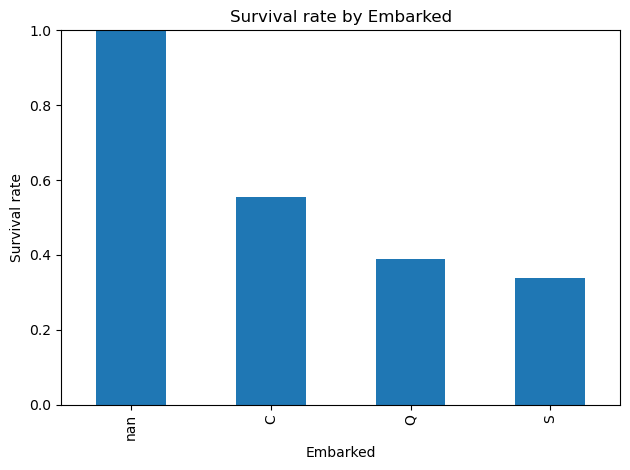

In [13]:
rate_by_embarked = df.groupby("Embarked", dropna=False)["Survived"].mean()
plot_rate(rate_by_embarked, "Survival rate by Embarked")


In [14]:
pivot_sex_pclass = pd.pivot_table(
    df, index="Sex", columns="Pclass", values="Survived", aggfunc="mean"
)
print("\nPivot (Sex x Pclass) = mean survival:")
print(pivot_sex_pclass)



Pivot (Sex x Pclass) = mean survival:
Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


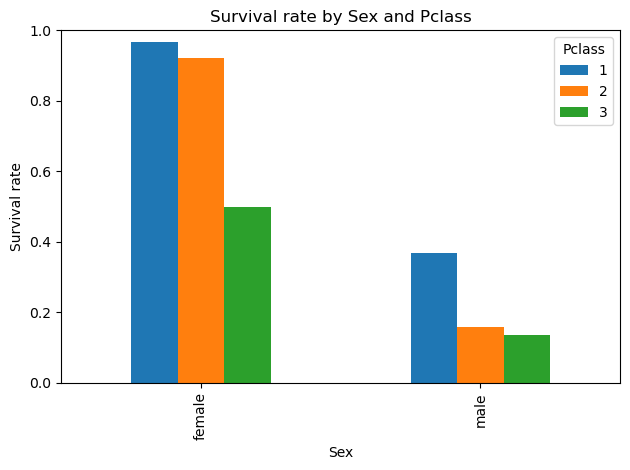

In [15]:
ax = pivot_sex_pclass.plot(kind="bar")
ax.set_ylim(0, 1)
ax.set_ylabel("Survival rate")
ax.set_title("Survival rate by Sex and Pclass")
plt.legend(title="Pclass")
plt.tight_layout()
plt.show()


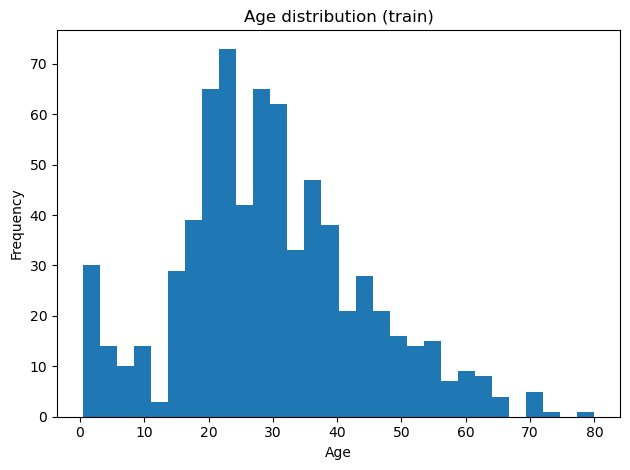

In [16]:
# Age distribution (note: missing values exist)
ax = df["Age"].dropna().plot(kind="hist", bins=30)
ax.set_title("Age distribution (train)")
ax.set_xlabel("Age")
plt.tight_layout()
plt.show()

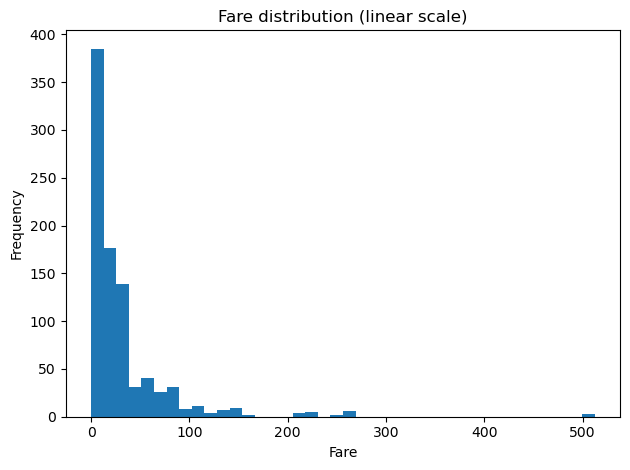

In [17]:
# Fare is skewed; look at both linear and log scales
ax = df["Fare"].dropna().plot(kind="hist", bins=40)
ax.set_title("Fare distribution (linear scale)")
ax.set_xlabel("Fare")
plt.tight_layout()
plt.show()

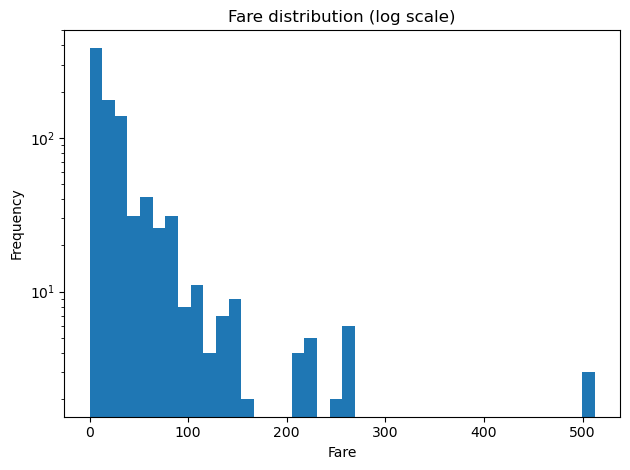

In [18]:
ax = df["Fare"].dropna().plot(kind="hist", bins=40, log=True)
ax.set_title("Fare distribution (log scale)")
ax.set_xlabel("Fare")
plt.tight_layout()
plt.show()

          median       mean    q1    q3    n
Survived                                    
0           28.0  30.626179  21.0  39.0  424
1           28.0  28.343690  19.0  36.0  290


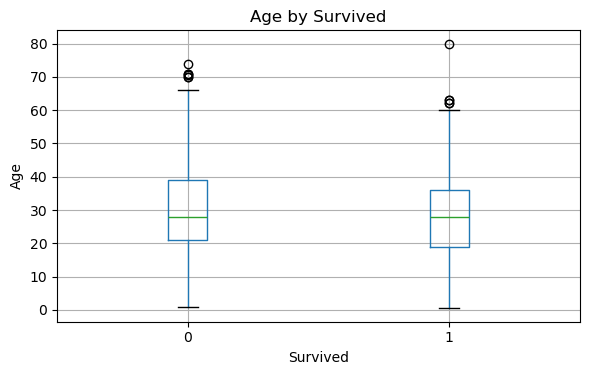

In [19]:

# quick sanity check on what boxplot should look like
out = (
    df[["Survived", "Age"]]
    .dropna()
    .groupby("Survived")["Age"]
    .agg(
        median="median",
        mean="mean",
        q1=lambda s: s.quantile(0.25),
        q3=lambda s: s.quantile(0.75),
        n="size",
    )
)
print(out)

fig, ax = plt.subplots(figsize=(6, 4))
df.boxplot(column="Age", by="Survived", ax=ax)

# Pandas adds a figure-level suptitle when you use `by=`—delete it:
fig.suptitle("")

ax.set_title("Age by Survived")
ax.set_xlabel("Survived")
ax.set_ylabel("Age")
plt.tight_layout()
plt.show()

In [20]:


out = (
    df[["Survived", "Fare"]]
    .dropna()
    .groupby("Survived")["Fare"]
    .agg(
        median="median",
        mean="mean",
        q1=lambda s: s.quantile(0.25),
        q2=lambda s: s.quantile(0.50),
        q3=lambda s: s.quantile(0.75),
        n="size",
    )
)
print("Summary statistics for Fare by Survived:")
print()
print(out)

Summary statistics for Fare by Survived:

          median       mean       q1    q2    q3    n
Survived                                             
0           10.5  22.117887   7.8542  10.5  26.0  549
1           26.0  48.395408  12.4750  26.0  57.0  342


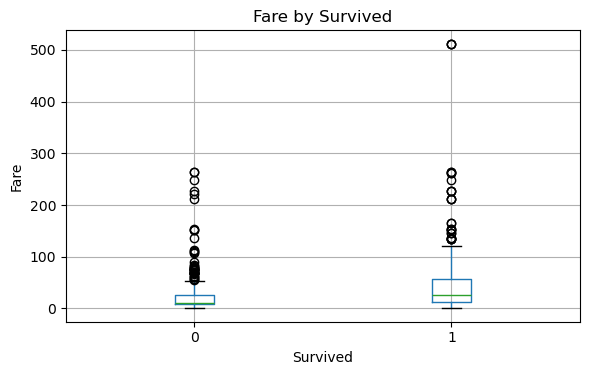

In [21]:
fig, ax = plt.subplots(figsize=(6, 4))
df.boxplot(column="Fare", by="Survived", ax=ax)
ax.set_title("Fare by Survived")
ax.set_xlabel("Survived")
ax.set_ylabel("Fare")
fig.suptitle("")  # remove automatic suptitle
plt.tight_layout()
plt.show()


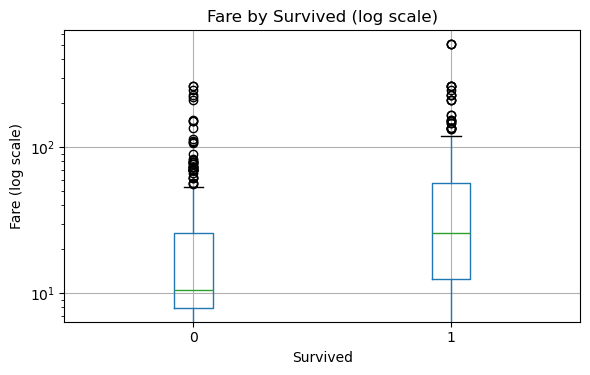

In [22]:
fig, ax = plt.subplots(figsize=(6, 4))
df.boxplot(column="Fare", by="Survived", ax=ax)
ax.set_yscale("log")  # <- log axis
ax.set_title("Fare by Survived (log scale)")
ax.set_xlabel("Survived")
ax.set_ylabel("Fare (log scale)")
fig.suptitle("")
plt.tight_layout()
plt.show()


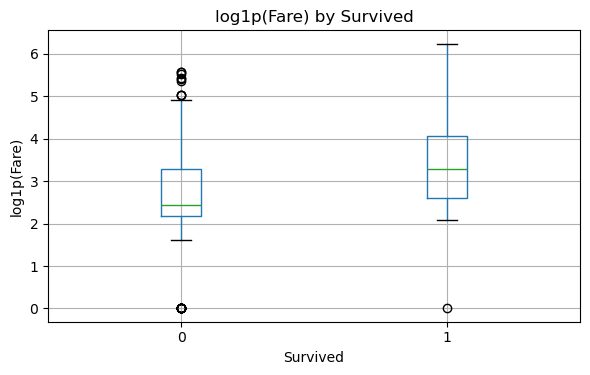

In [23]:

df2 = df.copy()
df2["Fare_log1p"] = np.log1p(df2["Fare"].clip(lower=0))  # guard against tiny negatives

fig, ax = plt.subplots(figsize=(6, 4))
df2.boxplot(column="Fare_log1p", by="Survived", ax=ax)
ax.set_title("log1p(Fare) by Survived")
ax.set_xlabel("Survived")
ax.set_ylabel("log1p(Fare)")
fig.suptitle("")
plt.tight_layout()
plt.show()


In [24]:
# %% boxplot for Fare w/ log scle

In [25]:


def outlier_stats(df, value_col="Fare", group_col="Survived"):
    rows = []
    for g, s in df[[group_col, value_col]].dropna().groupby(group_col)[value_col]:
        s = s.astype(float)
        q1, q3 = s.quantile([0.25, 0.75])
        iqr = q3 - q1
        low_fence = q1 - 1.5 * iqr
        high_fence = q3 + 1.5 * iqr

        n = len(s)
        n_low = int((s < low_fence).sum())
        n_high = int((s > high_fence).sum())
        n_out = n_low + n_high

        rows.append(
            {
                group_col: g,
                "n": n,
                "q1": q1,
                "median": s.median(),
                "q3": q3,
                "iqr": iqr,
                "low_fence": low_fence,
                "high_fence": high_fence,
                # counts
                "n_outliers_low": n_low,
                "n_outliers_high": n_high,
                "n_outliers_total": n_out,
                # percentages
                "pct_in_box": s.between(q1, q3).mean(),  # ~0.50 by definition
                "pct_outliers_low": n_low / n,
                "pct_outliers_high": n_high / n,
                "pct_outliers_total": n_out / n,
                # optional: make counts comparable per-100 passengers
                "outliers_high_per_100": 100 * n_high / n,
            }
        )
    cols_order = [
        group_col,
        "n",
        "q1",
        "median",
        "q3",
        "iqr",
        "low_fence",
        "high_fence",
        "n_outliers_low",
        "n_outliers_high",
        "n_outliers_total",
        "pct_in_box",
        "pct_outliers_low",
        "pct_outliers_high",
        "pct_outliers_total",
        "outliers_high_per_100",
    ]
    return pd.DataFrame(rows)[cols_order]


out = outlier_stats(df, "Fare", "Survived")
print(
    out.assign(
        pct_in_box=lambda d: d.pct_in_box.round(3),
        pct_outliers_low=lambda d: d.pct_outliers_low.round(3),
        pct_outliers_high=lambda d: d.pct_outliers_high.round(3),
        pct_outliers_total=lambda d: d.pct_outliers_total.round(3),
        outliers_high_per_100=lambda d: d.outliers_high_per_100.round(1),
    ).round(2)
)


   Survived    n     q1  median    q3    iqr  low_fence  high_fence  \
0         0  549   7.85    10.5  26.0  18.15     -19.36       53.22   
1         1  342  12.48    26.0  57.0  44.52     -54.31      123.79   

   n_outliers_low  n_outliers_high  n_outliers_total  pct_in_box  \
0               0               43                43        0.53   
1               0               28                28        0.50   

   pct_outliers_low  pct_outliers_high  pct_outliers_total  \
0               0.0               0.08                0.08   
1               0.0               0.08                0.08   

   outliers_high_per_100  
0                    7.8  
1                    8.2  


C:\Users\zacha\AppData\Local\Temp\ipykernel_18836\1054459274.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_rate(df.groupby("FamilyBin")["Survived"].mean(), "Survival by Family size")


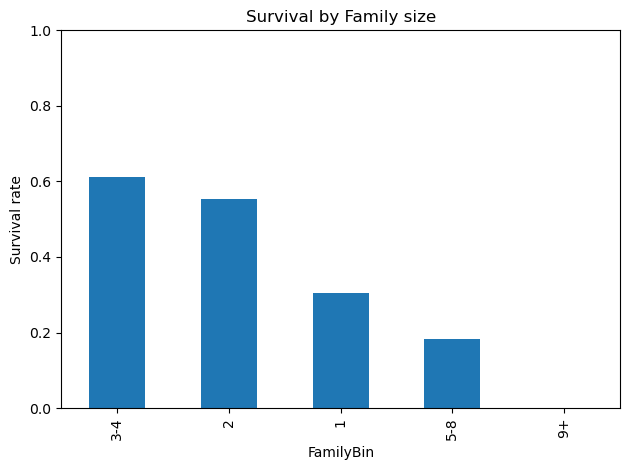

In [26]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["FamilyBin"] = pd.cut(
    df["FamilySize"], bins=[0, 1, 2, 4, 8, 20], labels=["1", "2", "3-4", "5-8", "9+"]
)
plot_rate(df.groupby("FamilyBin")["Survived"].mean(), "Survival by Family size")


In [27]:
OUT = ROOT / "outputs" / "eda"
OUT.mkdir(parents=True, exist_ok=True)
pivot_sex_pclass.to_csv(OUT / "pivot_sex_pclass.csv", index=True)
na.to_csv(OUT / "missingness.csv", header=["n_missing"])
print(f"\nSaved pivot and missingness tables to {OUT}")



Saved pivot and missingness tables to D:\ActiveProjects\titanic\outputs\eda
